<h1><center>Customer Churn Prediction</center></h1>
<h3><center>Training and Testing</center></h3>



In this notebook, I made data 2 ML based-experiments to prove that the engineered features achieve better accuracy. In addition to reporting different acurracy metrics

<div id="toc_container">
<p class="toc_title">Table Of Contents</p>
<ul class="toc_list">
  <li><a href="#ex_1">1. 1st Experiment </a></li>

<li><a href="#ex_2">2. 2nd Experiment</a></li> 

<li><a href="#results">3. Result Analysis </a></li> 
    
<li><a href="#deep_learning">3. Deep Learning (Optional)</a></li> 

    
</ul>
</div>


In [1]:
# importing the needed Packages
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix # required Accuracy metirics  mainly(Accuracy score,  F1 -secore)
from utils.preprocessing import feature_engineering, remove_outliers,encoder ,features_selection ,features_scaling ,KNN_oversample
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt


In [2]:
train_df = pd.read_csv('datasets/train_set.csv')
test_df = pd.read_csv('datasets/test_set.csv')

In this case, it's better to use **Machine Learning** model than **Deep Learning** because our dataset isn't big.

That why I went for data engineering techinques to introduce better and meaningful featuers




Too many Classifiers can be used in this case, but I chose ,**Ensemble Learning**, Random forest classifier

Define the train and test pipelines

In [3]:
def train_pipeline(df , with_features):
    result  = df.copy()
    result,idx_removed = remove_outliers(result ,['minutes' , 'charge'] , 'no')
    result = feature_engineering(result ,with_features ,with_features,with_features)
    result =  features_scaling(result)
    result,cols_encoded = encoder(result)
    result = features_selection(result, with_features)
    X, y = KNN_oversample(result)
    rf_clf = RandomForestClassifier(random_state=6 )
    rf_clf.fit(X, y)
    return rf_clf , X,y

In [4]:
def test_pipeline(df , with_features):
    result  = df.copy()
    result = feature_engineering(result ,with_features ,with_features,with_features)
    result =  features_scaling(result)
    result,cols_encoded = encoder(result)
    result = features_selection(result, with_features)
    X_val,y_val = result.drop(['churn_encoded'] , axis =1) , result['churn_encoded']
    return X_val,y_val

In the testing phase, We can't perform outliers removal and oversampling

## 1st Expirment  <a class="anchor" id="ex_1"></a>

In this Experiment, I will train and test the Random Forest Classifier on the dataset **with the engineered featuers**

In [15]:
with_features_engineered = True

In [16]:
rf_clf1 , X_exp1,y_exp1 = train_pipeline(train_df , with_features_engineered)

When chrun =  no  the  number of outilers in  total_night_minutes :  25
When chrun =  no  the  number of outilers in  total_day_minutes :  16
When chrun =  no  the  number of outilers in  total_eve_minutes :  23
percentage of outliers: 2.3110785033015406


When chrun =  no  the  number of outilers in  total_night_charge :  2
When chrun =  no  the  number of outilers in  total_day_charge :  1
When chrun =  no  the  number of outilers in  total_eve_charge :  1
percentage of outliers: 0.1502065339842283


Tatget classes counts after oversampling:
 0    2659
1    2659
Name: churn_encoded, dtype: int64


In [17]:
X_val_exp1,y_val_exp1 = test_pipeline(test_df , with_features_engineered)

In [18]:
exp1_preds= rf_clf1.predict(X_val_exp1)

## 2nd Expirment  <a class="anchor" id="ex_2"></a>

In this Experiment, I will train and test the Random Forest Classifier on the dataset **without the engineered featurese**

In [29]:
with_features_engineered = False

In [30]:
rf_clf2 , X_exp2,y_exp2 = train_pipeline(train_df , with_features_engineered)

When chrun =  no  the  number of outilers in  total_night_minutes :  25
When chrun =  no  the  number of outilers in  total_day_minutes :  16
When chrun =  no  the  number of outilers in  total_eve_minutes :  23
percentage of outliers: 2.3110785033015406


When chrun =  no  the  number of outilers in  total_night_charge :  2
When chrun =  no  the  number of outilers in  total_day_charge :  1
When chrun =  no  the  number of outilers in  total_eve_charge :  1
percentage of outliers: 0.1502065339842283


Tatget classes counts after oversampling:
 0    2659
1    2659
Name: churn_encoded, dtype: int64


In [31]:
X_val_exp2,y_val_exp2 = test_pipeline(test_df , with_features_engineered)

In [32]:
exp2_preds= rf_clf2.predict(X_val_exp2)

## Result Analysis <a class="anchor" id="results"></a>

In [23]:
def reporting(exp_preds, y_val):
    print(classification_report(exp_preds, y_val))
    title = "Experiment acuracy is: " + str(accuracy_score(exp_preds, y_val)* 100)
    
    C_M = confusion_matrix(exp_preds, y_val)
    plt.rc('figure', figsize=[5,5])
    plt.matshow(C_M,cmap="Blues")
    plt.title(title)
    for i in range(0,C_M.shape[0]):
        for j in range(0,C_M.shape[1]):
            plt.annotate(C_M[i,j],(j,i))
    

Expirment 1 Results

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       939
           1       0.80      0.88      0.84       124

    accuracy                           0.96      1063
   macro avg       0.89      0.92      0.91      1063
weighted avg       0.96      0.96      0.96      1063



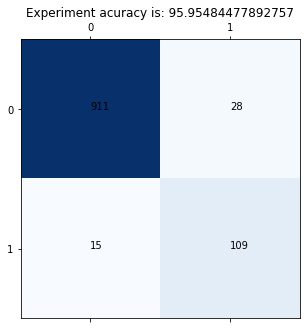

In [24]:
reporting(exp1_preds, y_val_exp1)

However expirment 2 Results

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       911
           1       0.78      0.70      0.74       152

    accuracy                           0.93      1063
   macro avg       0.87      0.84      0.85      1063
weighted avg       0.93      0.93      0.93      1063



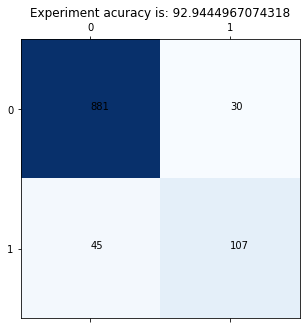

In [33]:
reporting(exp2_preds, y_val_exp2)

Clearly, We can see that the model trained on the engineered featuers could achieve about 3% higher in the total accuracy 

and could classify better on the both classes, That means it's little imbaised

In [34]:
perm = PermutationImportance(rf_clf1, random_state=1).fit(X_val_exp1, y_val_exp1)
eli5.show_weights(perm, feature_names = X_val_exp1.columns.tolist())


Weight,Feature
0.1106 ± 0.0076,total_charge
0.0482 ± 0.0052,number_customer_service_calls_binned
0.0339 ± 0.0063,international_plan_encoded
0.0230 ± 0.0087,voice_mail_plan_encoded
0.0164 ± 0.0067,total_intl_calls
0.0122 ± 0.0052,total_intl_minutes
0.0051 ± 0.0061,number_vmail_messages
0.0045 ± 0.0018,state_3
0.0028 ± 0.0017,state_1
0.0026 ± 0.0025,state_0


In [35]:
perm = PermutationImportance(rf_clf2, random_state=1).fit(X_val_exp2, y_val_exp2)
eli5.show_weights(perm, feature_names = X_val_exp2.columns.tolist())

Weight,Feature
0.0918 ± 0.0174,total_day_charge
0.0467 ± 0.0070,number_customer_service_calls
0.0282 ± 0.0061,international_plan_encoded
0.0203 ± 0.0147,total_eve_charge
0.0141 ± 0.0070,voice_mail_plan_encoded
0.0105 ± 0.0098,total_intl_calls
0.0085 ± 0.0059,total_intl_charge
0.0070 ± 0.0039,state_2
0.0068 ± 0.0070,total_night_charge
0.0036 ± 0.0065,state_0


We could also see that the engineered features got higher weights in the model

## Deep Learning <a class="anchor" id="deep_learning"></a>

Giving a try to test a Neural Network.

Altough Deep Learning is more intelligent than Machine Learining, it needs huge dataset to be able to perform better than ML 

In [36]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [37]:
early_stopping = callbacks.EarlyStopping(patience = 5 ,min_delta = 0.001, restore_best_weights =True )
input_shape = [X_exp1.shape[1]]

Epoch 1/50
84/84 [==============================] - 1s 4ms/step - loss: 0.5634 - accuracy: 0.7369 - val_loss: 0.4681 - val_accuracy: 0.8288
Epoch 2/50
84/84 [==============================] - 0s 2ms/step - loss: 0.4580 - accuracy: 0.8090 - val_loss: 0.4338 - val_accuracy: 0.8184
Epoch 3/50
84/84 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8304 - val_loss: 0.3684 - val_accuracy: 0.8589
Epoch 4/50
84/84 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8396 - val_loss: 0.3628 - val_accuracy: 0.8561
Epoch 5/50
84/84 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.8498 - val_loss: 0.3305 - val_accuracy: 0.8674
Epoch 6/50
84/84 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8528 - val_loss: 0.3234 - val_accuracy: 0.8692
Epoch 7/50
84/84 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.8652 - val_loss: 0.3310 - val_accuracy: 0.8730
Epoch 8/50
84/84 [==

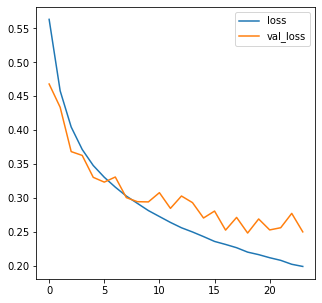

In [38]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=input_shape),
    layers.Dense(16, activation='relu'),    
    layers.Dense(1 , activation='sigmoid' )
    
])
model.compile(
    optimizer='adam',
   loss='binary_crossentropy',
    metrics=['accuracy']
)
history = model.fit(
    X_exp1, y_exp1,
    validation_data=(X_val_exp1, y_val_exp1),
    batch_size=64,
    epochs=50,
    callbacks=[early_stopping] # to avoid overfitting
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [39]:
prdsss = model.predict(X_val_exp1)

In [40]:
prdsss = [1 * (x[0]>=0.5) for x in prdsss]


              precision    recall  f1-score   support

           0       0.93      0.97      0.95       895
           1       0.77      0.63      0.70       168

    accuracy                           0.91      1063
   macro avg       0.85      0.80      0.82      1063
weighted avg       0.91      0.91      0.91      1063



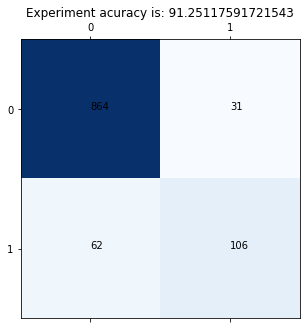

In [41]:
reporting(prdsss, y_val_exp1)